In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt

df=  pd.read_csv("../results/exp_3_no_clean_no_int_fulldev.csv")

In [24]:
query_lengths = df["query"].dropna().apply(len)

In [25]:
scores = df["score"]

In [26]:
sorted_with_idx_query_lengths = query_lengths.sort_values()

In [27]:
matching_scores = scores.iloc[sorted_with_idx_query_lengths.index]

In [60]:
import scipy

corr = scipy.stats.pearsonr(x=sorted_with_idx_query_lengths.to_numpy(), y=matching_scores.to_numpy())

In [61]:
corr

(-0.2066910471880134, 0.0)

TypeError: text() missing 2 required positional arguments: 'y' and 's'

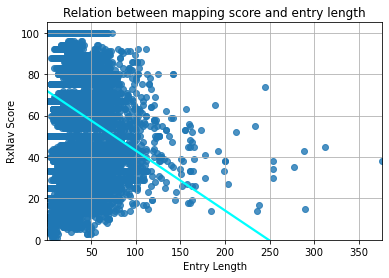

In [87]:
plt.title("Relation between mapping score and entry length")
plt.xlabel("Entry Length")
plt.ylabel("RxNav Score")
# plt.scatter(sorted_with_idx_query_lengths.to_list(), matching_scores.to_list())
plt.grid()
plt.ylim(0, 105)
sns.regplot(x=sorted_with_idx_query_lengths.to_list(), y=matching_scores.to_list(), line_kws={'color':'cyan'}, ci=None)
# plt.savefig("../results/figures/relation_score_entry_len.png")
plt.text("a")
plt.show()

In [83]:
data = pd.DataFrame(data={"Entry Length":sorted_with_idx_query_lengths.to_list(), "Score":matching_scores.to_list()})

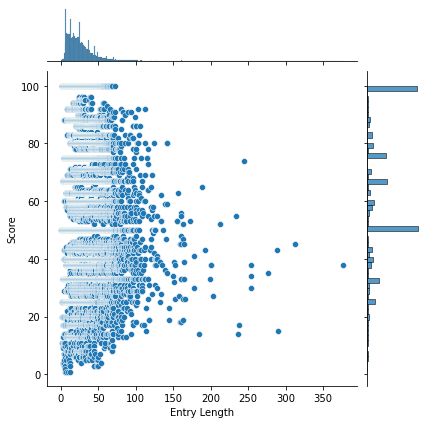

In [84]:
# plt.title("Relation between mapping score and entry length")
# plt.xlabel("Entry Length")
# plt.ylabel("RxNav Score")
# plt.scatter(sorted_with_idx_query_lengths.to_list(), matching_scores.to_list())
# plt.grid()
# plt.ylim(0, 105)
sns.jointplot(x="Entry Length", y="Score", data=data)
# (x=sorted_with_idx_query_lengths.to_list(), y=matching_scores.to_list(), line_kws={'color':'cyan'}, ci=None)
# plt.savefig("../results/figures/relation_score_entry_len.png")
plt.show()

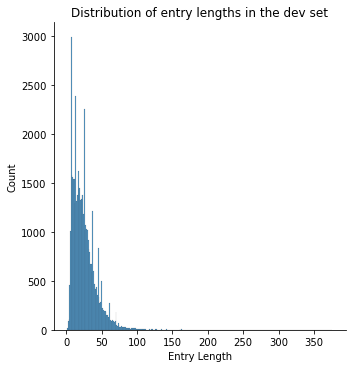

In [57]:
import seaborn as sns

sns.displot(query_lengths)
plt.title("Distribution of entry lengths in the dev set")
plt.xlabel("Entry Length")
plt.savefig("../results/figures/dev_set_entry_len_dist.png")
plt.show()

In [13]:
sorted_query_lengths = query_lengths.sort_values(ignore_index=True)

In [18]:
over_50 = df.where(query_lengths > 50).dropna()

In [21]:
import numpy as np
np.median(over_50["score"])

50.0

In [22]:
len(over_50)

3753